# Q1:  La Liga

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [8]:
la=pd.read_csv('laliga.csv')

In [74]:
la.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,year,avg_points,Win_percent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,8,3,4,79,1929-30,1929-30,1,1929,1.587618,59.630702
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,12,4,6,83,1929-30,1929-30,1,1929,1.543085,57.241130
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,9,7,6,56,1929-30,2002-03,1,1929,1.316756,47.475134
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,11,10,7,50,1931-32,1987-88,1,1931,1.271021,44.557057
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,5,8,10,49,1929-30,1929-30,1,1929,1.219406,43.772629


In [44]:
j_y=[ int(la['Debut'].str.split('-')[i][0])  for i in range(len(la['Debut']))]

la['year']=j_y

In [34]:
la['avg_points']=la['Points']/la['GamesPlayed']

In [73]:
la['Win_percent']=(la['GamesWon']/la['GamesPlayed'])*100

### 1. Which are the teams which started playing between 1930-1980?

In [103]:
teams_80=np.array(la[(la['year']>=1930) & (la['year']<=1980)]['Team'])
print('The teams that started between 1930 and 1980 are:\n\n',teams_80)

The teams that started between 1930 and 1980 are:

 ['Valencia' 'Sevilla' 'Zaragoza' 'Real Betis' 'Deportivo La Coruna'
 'Celta Vigo' 'Valladolid' 'Sporting Gijon' 'Osasuna' 'Malaga' 'Oviedo'
 'Mallorca' 'Las Palmas' 'Granada' 'Rayo Vallecano' 'Elche' 'Hercules'
 'Tenerife' 'Murcia' 'Alaves' 'Levante' 'Salamanca' 'Sabadell' 'Cadiz'
 'Castellon' 'Cordoba' 'Recreativo' 'Burgos CF' 'Pontevedra' 'Gimnastic'
 'Alcoyano' 'Jaen' 'AD Almeria' 'Lleida' 'Condal' 'Atletico Tetuan'
 'Cultural Leonesa']


### 2. Which are the top 5 teams in terms of points?

In [71]:
top_5=la.sort_values(by='avg_points',ascending=False).head(5)[['Team','avg_points']]
top_5.set_index('Team',inplace=True)                                                       

In [72]:
print('The top 5 teams in terms of avg points per game are:\n',top_5)

The top 5 teams in terms of avg points per game are:
                  avg_points
Team                       
Real Madrid        1.587618
Barcelona          1.543085
Villarreal         1.501548
Atletico Madrid    1.316756
Valencia           1.271021


### 3. What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

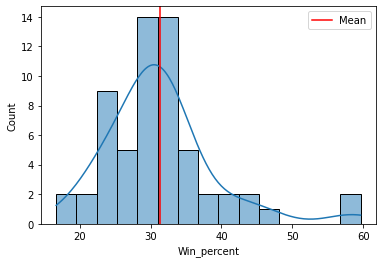

In [87]:
sns.histplot(x='Win_percent',data=la,kde=True)
plt.axvline(la['Win_percent'].mean(),color='red',label='Mean')
plt.legend()
plt.show()

In [91]:
print('Shapiro test: ',stats.shapiro(la['Win_percent']))
print('Mean value for win %: ',la['Win_percent'].mean())
print('Median value for win %: ',la['Win_percent'].median())

Shapiro test:  (nan, 1.0)
Mean value for win %:  31.364789990145002
Median value for win %:  30.49172226340499


Conclusion

1. From the shapiro test result it is clearly visible that the data is normally distributed
2. By comparing the mean and median values we can see they are very close to each other.

Hence the data is normally distributed

In [137]:
top_5_win=la.sort_values(by='Win_percent',ascending=False)[['Team','Win_percent']].head()
top_5_win.set_index('Team',inplace=True)
print('Top 5 teams with highest win % are: \n',top_5_win)


Top 5 teams with highest win % are: 
                  Win_percent
Team                        
Real Madrid        59.630702
Barcelona          57.241130
Atletico Madrid    47.475134
Valencia           44.557057
Athletic Bilbao    43.772629


### 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [132]:
k=[]
for i in la['BestPosition']:
    if i in range(1,4):
        k.append('1 to 3')
    elif i in range(4,8):
        k.append('4 to 7')
    else:
        k.append(np.NaN)

la['group']=k

In [133]:
com=la.groupby('group')[['GamesPlayed','GamesWon']].agg('sum')

In [134]:
com['WIn_%']=(com['GamesWon']/com['GamesPlayed'])*100

In [135]:
com

,GamesPlayed,GamesWon,WIn_%
group,,,
1 to 3,33082,13875,41.941237
4 to 7,11966,3727,31.146582


Conclusion:

From the above table we can see that the win percentage for teams who have got best position between 1 and 3 has 10% more win % than teams who have best position between 4 and 7

# Q2: Blood Pressure

In [7]:
n=200
xbar=140 # mm Hg
s=25 # mm Hg

In [8]:
se= s/np.sqrt(n)

### a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [9]:
print('Standard Error = ',se)

Standard Error =  1.7677669529663687


The standard error for a sample signifies how much the estimated mean from the sample can actually deviate from the population mean.

### b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [10]:
np.abs(round(stats.norm.isf(q=0.025),2))

1.96

In [12]:
print('The 95% confidence interval for true mean blood pressure for all 60 year old women is: \n','[',xbar-(1.96*se),',',xbar+(1.96*se),']')

The 95% confidence interval for true mean blood pressure for all 60 year old women is: 
 [ 136.5351767721859 , 143.4648232278141 ]


### c) Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [13]:
se2= s/np.sqrt(100)

In [14]:
print('The 95% confidence interval for true mean blood pressure for all 60 year old women is with n=100: \n','[',xbar-(1.96*se2),',',xbar+(1.96*se2),']')

The 95% confidence interval for true mean blood pressure for all 60 year old women is with n=100: 
 [ 135.1 , 144.9 ]


### d)	Which of the two above intervals are wider?

In [15]:
range1=(xbar+(1.96*se))-(xbar-(1.96*se))
range2=(xbar+(1.96*se2))-(xbar-(1.96*se2))
print('Width of 1st interval = ',range1)
print('Width of 2nd interval = ',range2)

Width of 1st interval =  6.929646455628188
Width of 2nd interval =  9.800000000000011


Conclusion:
   
We can see that the interval with 100 sample is wider

### e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

1. When sample size increases we are considering wider range of data which represents the population better. 
2. When we calculate the sample statistics as we have considered larger sample, so the value we calculate comes closer to the population parameter. This in turn gives higher confidence in predicting the population parameter.

The larger the sample size the more information we have and so our uncertainty reduces.The larger the sample size the more information we have and so our uncertainty reduces.


# Q3: Golf

In [2]:
go=pd.read_csv("Golf.csv")

In [152]:
go.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [3]:
cur=np.array(go['Current'])
ne=np.array(go['New'])

In [158]:
cur

array([264, 261, 267, 272, 258, 283, 258, 266, 259, 270, 263, 264, 284,
       263, 260, 283, 255, 272, 266, 268, 270, 287, 289, 280, 272, 275,
       265, 260, 278, 275, 281, 274, 273, 263, 275, 267, 279, 274, 276,
       262], dtype=int64)

### 1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

H0: The distance travelled by new ball = The distance covered by current ball

HA: The distace is not same for new and current balls

### 2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [159]:
# two sample unpaired ttest

#shapiro test

# hypothesis for shapiro
    # H0: Data is normally distributedd
    # HA: Data is not normally distributed

stats.shapiro(cur)

(0.9707046747207642, 0.378787100315094)

In [160]:
stats.shapiro(ne)

(0.9678263664245605, 0.3064655363559723)

In [ ]:
# both the data have pvalue> 0.05 hence we accept the H0, ie; the data is normally distributed.

# hence two sample ttest_ind

In [163]:
stats.ttest_ind(ne,cur)

Ttest_indResult(statistic=-1.3283615935245678, pvalue=0.18793228491854663)

Conclusion:
    
Here we can see that the pvalue is >0.05, hence accept the H0, ie; with 95% confidence we can say that the both new and current balls travel the same distance

### 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [4]:
# new:
n=40
xbar1=np.mean(ne)
s1=np.std(ne,ddof=1)
se1=s1/np.sqrt(n)

print('The 95% confidence interval for population mean of new model ball: \n','[',xbar1-(1.96*se1),',',xbar1+(1.96*se1),']')

The 95% confidence interval for population mean of new model ball: 
 [ 264.43291753097594 , 270.56708246902406 ]


In [5]:
# current:
n=40
xbar2=np.mean(cur)
s2=np.std(cur,ddof=1)
se2=s2/np.sqrt(n)

print('The 95% confidence interval for population mean of new model ball: \n','[',xbar2-(1.96*se2),',',xbar2+(1.96*se2),']')

The 95% confidence interval for population mean of new model ball: 
 [ 267.5624218952518 , 272.98757810474814 ]


In [6]:
se_pop=np.sqrt(((s2**2)/n)+((s2**2)/n))

In [9]:
(xbar2-xbar1)

2.7749999999999773

In [11]:
print('The 95% confidence interval for mean difference: \n','[',(xbar2-xbar1)-(1.96*se_pop),',',(xbar2-xbar1)+(1.96*se_pop),']')

The 95% confidence interval for mean difference: 
 [ -1.0611647447311383 , 6.611164744731093 ]
